In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/league-of-legends-diamond-ranked-games-10-min/high_diamond_ranked_10min.csv


In [2]:
import tensorflow as tf
from tensorflow.keras import layers
import seaborn as sns

In [3]:
data = pd.read_csv('../input/league-of-legends-diamond-ranked-games-10-min/high_diamond_ranked_10min.csv')

In [4]:
data.head()

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,...,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,0,12,1,0,5,5,5,0,0,...,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,0,15,0,0,7,11,4,1,1,...,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,4524384067,0,43,1,0,4,5,5,1,0,...,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,4436033771,0,75,4,0,6,6,6,0,0,...,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4


In [5]:
data.shape

(9879, 40)

In [6]:
data.drop('gameId', axis=1, inplace=True)

In [7]:
data = data.sample(frac=1).reset_index(drop=True)

In [8]:
y = data['blueWins']

In [9]:
X = data.drop('blueWins', axis=1, inplace=False)

In [10]:
y.head()

0    0
1    1
2    1
3    1
4    1
Name: blueWins, dtype: int64

In [11]:
X.head()

,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,blueTowersDestroyed,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,19,5,1,6,7,7,0,0,0,0,...,0,16492,7.2,18239,212,50,420,1185,21.2,1649.2
1,22,2,1,6,5,7,1,0,1,0,...,0,16345,7.2,17952,215,67,-592,-242,21.5,1634.5
2,22,3,0,3,5,3,0,0,0,0,...,0,15946,6.8,18711,249,53,-24,286,24.9,1594.6
3,13,0,1,12,3,16,1,1,0,0,...,0,14094,6.6,15612,190,48,-5349,-4131,19.0,1409.4
4,12,2,1,9,7,10,1,1,0,0,...,0,16456,6.8,18286,187,47,-1645,-1489,18.7,1645.6


<AxesSubplot:>

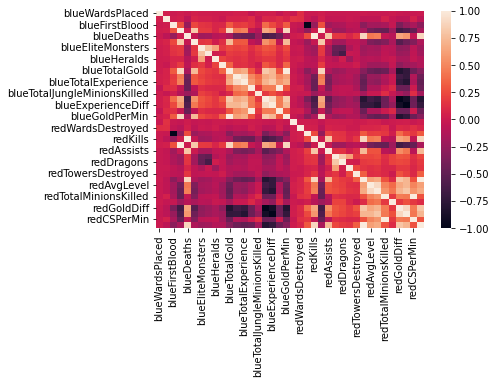

In [12]:
sns.heatmap(X.corr())

### Opportunity to Run a PCA to clean up Features

In [13]:
train_test_split = 0.7

num_examples = X.shape[0]
num_train_examples = int(num_examples*train_test_split)
num_test_examples = int(num_examples - num_train_examples)

print(num_examples)
print(num_train_examples)
print(num_test_examples)

9879
6915
2964


In [14]:
optimizer = tf.keras.optimizers.Adam(
    learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, amsgrad=False, name='Adam'
)

In [15]:
inputs = tf.keras.Input(shape=(38,))
x = tf.keras.layers.Dense(16, activation=tf.nn.relu)(inputs)
x = tf.keras.layers.Dense(16, activation=tf.nn.relu)(x)
outputs = tf.keras.layers.Dense(2, activation=tf.nn.softmax)(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 38)]              0         
_________________________________________________________________
dense (Dense)                (None, 16)                624       
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 34        
Total params: 930
Trainable params: 930
Non-trainable params: 0
_________________________________________________________________



User settings:

   KMP_AFFINITY=granularity=fine,verbose,compact,1,0
   KMP_BLOCKTIME=0
   KMP_SETTINGS=1
   KMP_WARNINGS=0

Effective settings:

   KMP_ABORT_DELAY=0
   KMP_ADAPTIVE_LOCK_PROPS='1,1024'
   KMP_ALIGN_ALLOC=64
   KMP_ALL_THREADPRIVATE=128
   KMP_ATOMIC_MODE=2
   KMP_BLOCKTIME=0
   KMP_CPUINFO_FILE: value is not defined
   KMP_DETERMINISTIC_REDUCTION=false
   KMP_DEVICE_THREAD_LIMIT=2147483647
   KMP_DISP_NUM_BUFFERS=7
   KMP_DUPLICATE_LIB_OK=false
   KMP_ENABLE_TASK_THROTTLING=true
   KMP_FORCE_REDUCTION: value is not defined
   KMP_FOREIGN_THREADS_THREADPRIVATE=true
   KMP_FORKJOIN_BARRIER='2,2'
   KMP_FORKJOIN_BARRIER_PATTERN='hyper,hyper'
   KMP_GTID_MODE=3
   KMP_HANDLE_SIGNALS=false
   KMP_HOT_TEAMS_MAX_LEVEL=1
   KMP_HOT_TEAMS_MODE=0
   KMP_INIT_AT_FORK=true
   KMP_LIBRARY=throughput
   KMP_LOCK_KIND=queuing
   KMP_MALLOC_POOL_INCR=1M
   KMP_NUM_LOCKS_IN_BLOCK=1
   KMP_PLAIN_BARRIER='2,2'
   KMP_PLAIN_BARRIER_PATTERN='hyper,hyper'
   KMP_REDUCTION_BARRIER='1,1'
  

In [16]:
model.compile(
    optimizer=optimizer, 
    loss=tf.keras.losses.SparseCategoricalCrossentropy(), 
    metrics=['accuracy']
)

In [17]:
X_train = X.iloc[0:num_train_examples, :]
y_train = y.iloc[0:num_train_examples]

X_test = X.iloc[num_train_examples:num_examples, :]
y_test = y.iloc[num_train_examples:num_examples]

In [18]:
print(X_test.shape)
X_test.head()

(2964, 38)


,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,blueTowersDestroyed,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
6915,17,4,0,5,7,6,0,0,0,0,...,0,16642,6.8,17933,204,48,1003,1777,20.4,1664.2
6916,19,6,0,5,4,6,1,1,0,0,...,0,16403,7.0,18907,233,64,-131,613,23.3,1640.3
6917,19,6,1,8,6,10,2,1,1,0,...,0,15529,6.8,17052,210,42,-2008,-2714,21.0,1552.9
6918,11,3,1,8,2,11,1,1,0,0,...,0,13001,5.8,14314,217,12,-4793,-3669,21.7,1300.1
6919,24,3,0,3,4,6,0,0,0,0,...,0,15790,6.8,16444,218,50,809,-638,21.8,1579.0


In [19]:
BATCH_SIZE = 32
EPOCHS = 300

In [20]:
X_train = X_train.to_numpy()
y_train = y_train.to_numpy()

In [21]:
model.fit(
    x=X_train, 
    y=y_train, 
    batch_size=BATCH_SIZE, 
    epochs=EPOCHS, 
    verbose='1',
    callbacks=None, 
    validation_split=0.2, 
    shuffle=True,
)

2022-01-12 01:21:33.480791: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/300
Epoch 2/300
Epoch 3/300
Epoch 4/300
Epoch 5/300
Epoch 6/300
Epoch 7/300
Epoch 8/300
Epoch 9/300
Epoch 10/300
Epoch 11/300
Epoch 12/300
Epoch 13/300
Epoch 14/300
Epoch 15/300
Epoch 16/300
Epoch 17/300
Epoch 18/300
Epoch 19/300
Epoch 20/300
Epoch 21/300
Epoch 22/300
Epoch 23/300
Epoch 24/300
Epoch 25/300
Epoch 26/300
Epoch 27/300
Epoch 28/300
Epoch 29/300
Epoch 30/300
Epoch 31/300
Epoch 32/300
Epoch 33/300
Epoch 34/300
Epoch 35/300
Epoch 36/300
Epoch 37/300
Epoch 38/300
Epoch 39/300
Epoch 40/300
Epoch 41/300
Epoch 42/300
Epoch 43/300
Epoch 44/300
Epoch 45/300
Epoch 46/300
Epoch 47/300
Epoch 48/300
Epoch 49/300
Epoch 50/300
Epoch 51/300
Epoch 52/300
Epoch 53/300
Epoch 54/300
Epoch 55/300
Epoch 56/300
Epoch 57/300
Epoch 58/300
Epoch 59/300
Epoch 60/300
Epoch 61/300
Epoch 62/300
Epoch 63/300
Epoch 64/300
Epoch 65/300
Epoch 66/300
Epoch 67/300
Epoch 68/300
Epoch 69/300
Epoch 70/300
Epoch 71/300
Epoch 72/300
Epoch 73/300
Epoch 74/300
Epoch 75/300
Epoch 76/300
Epoch 77/300
Epoch 78

In [22]:
loss, accuracy = model.evaluate(X_test, y_test)

93/93 [==============================] - 0s 1ms/step - loss: 0.5439 - accuracy: 0.7260
